<a href="https://colab.research.google.com/github/JUSTYNAYANG/summerpy/blob/main/20240117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#getting photo



In [4]:
import requests

In [5]:
from PIL import Image

In [6]:
url = "https://hips.hearstapps.com/hmg-prod/images/cute-photos-of-cats-looking-at-camera-1593184780.jpg?crop=0.6672958942897593xw:1xh;center,top&resize=980:*"

In [7]:
r = requests.get(url)
with open("cat.jpg", "wb") as f:
  f.write(r.content)


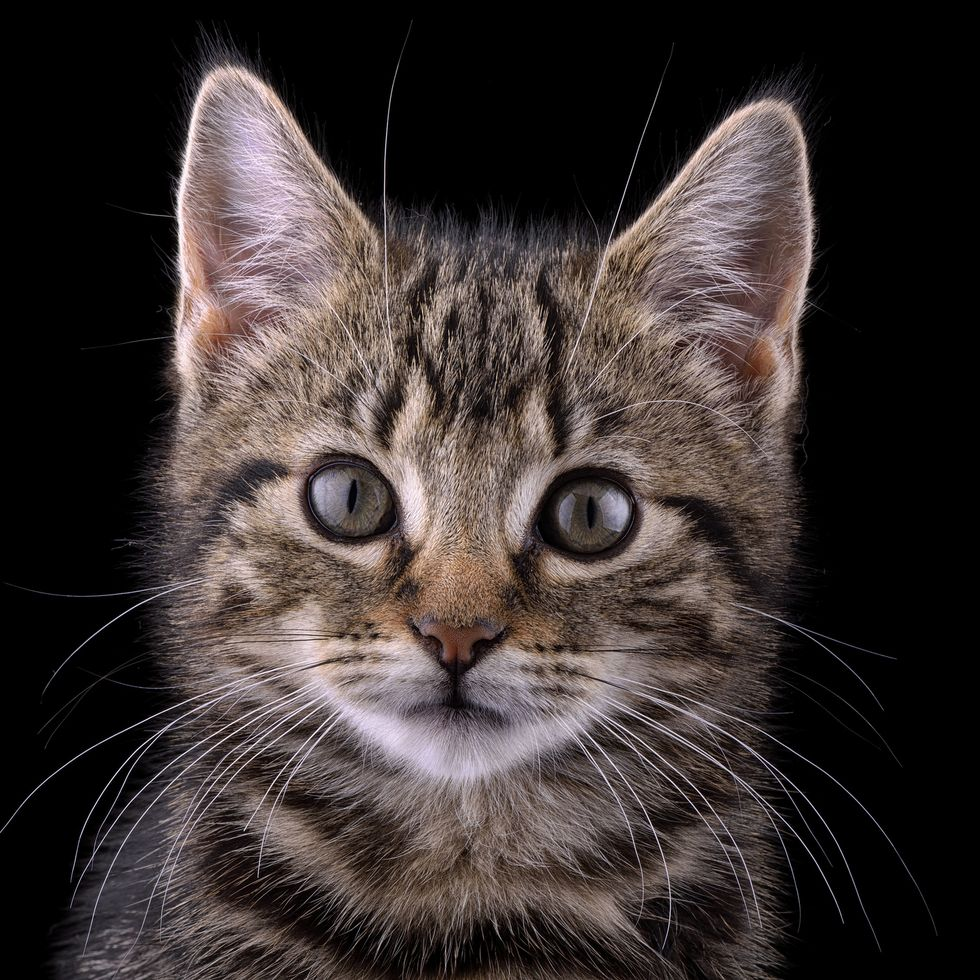

In [8]:
Image.open("cat.jpg")

In [9]:
from io import BytesIO
from PIL import Image

In [23]:
url1 = "https://d.newsweek.com/en/full/2010450/cat-empty-bowls.jpg?w=1600&h=1600&q=88&f=9c61a9157557f6da4828e0f0ca73ee14"

In [24]:
r = requests.get(url1)

In [25]:
im = Image.open(BytesIO(r.content))

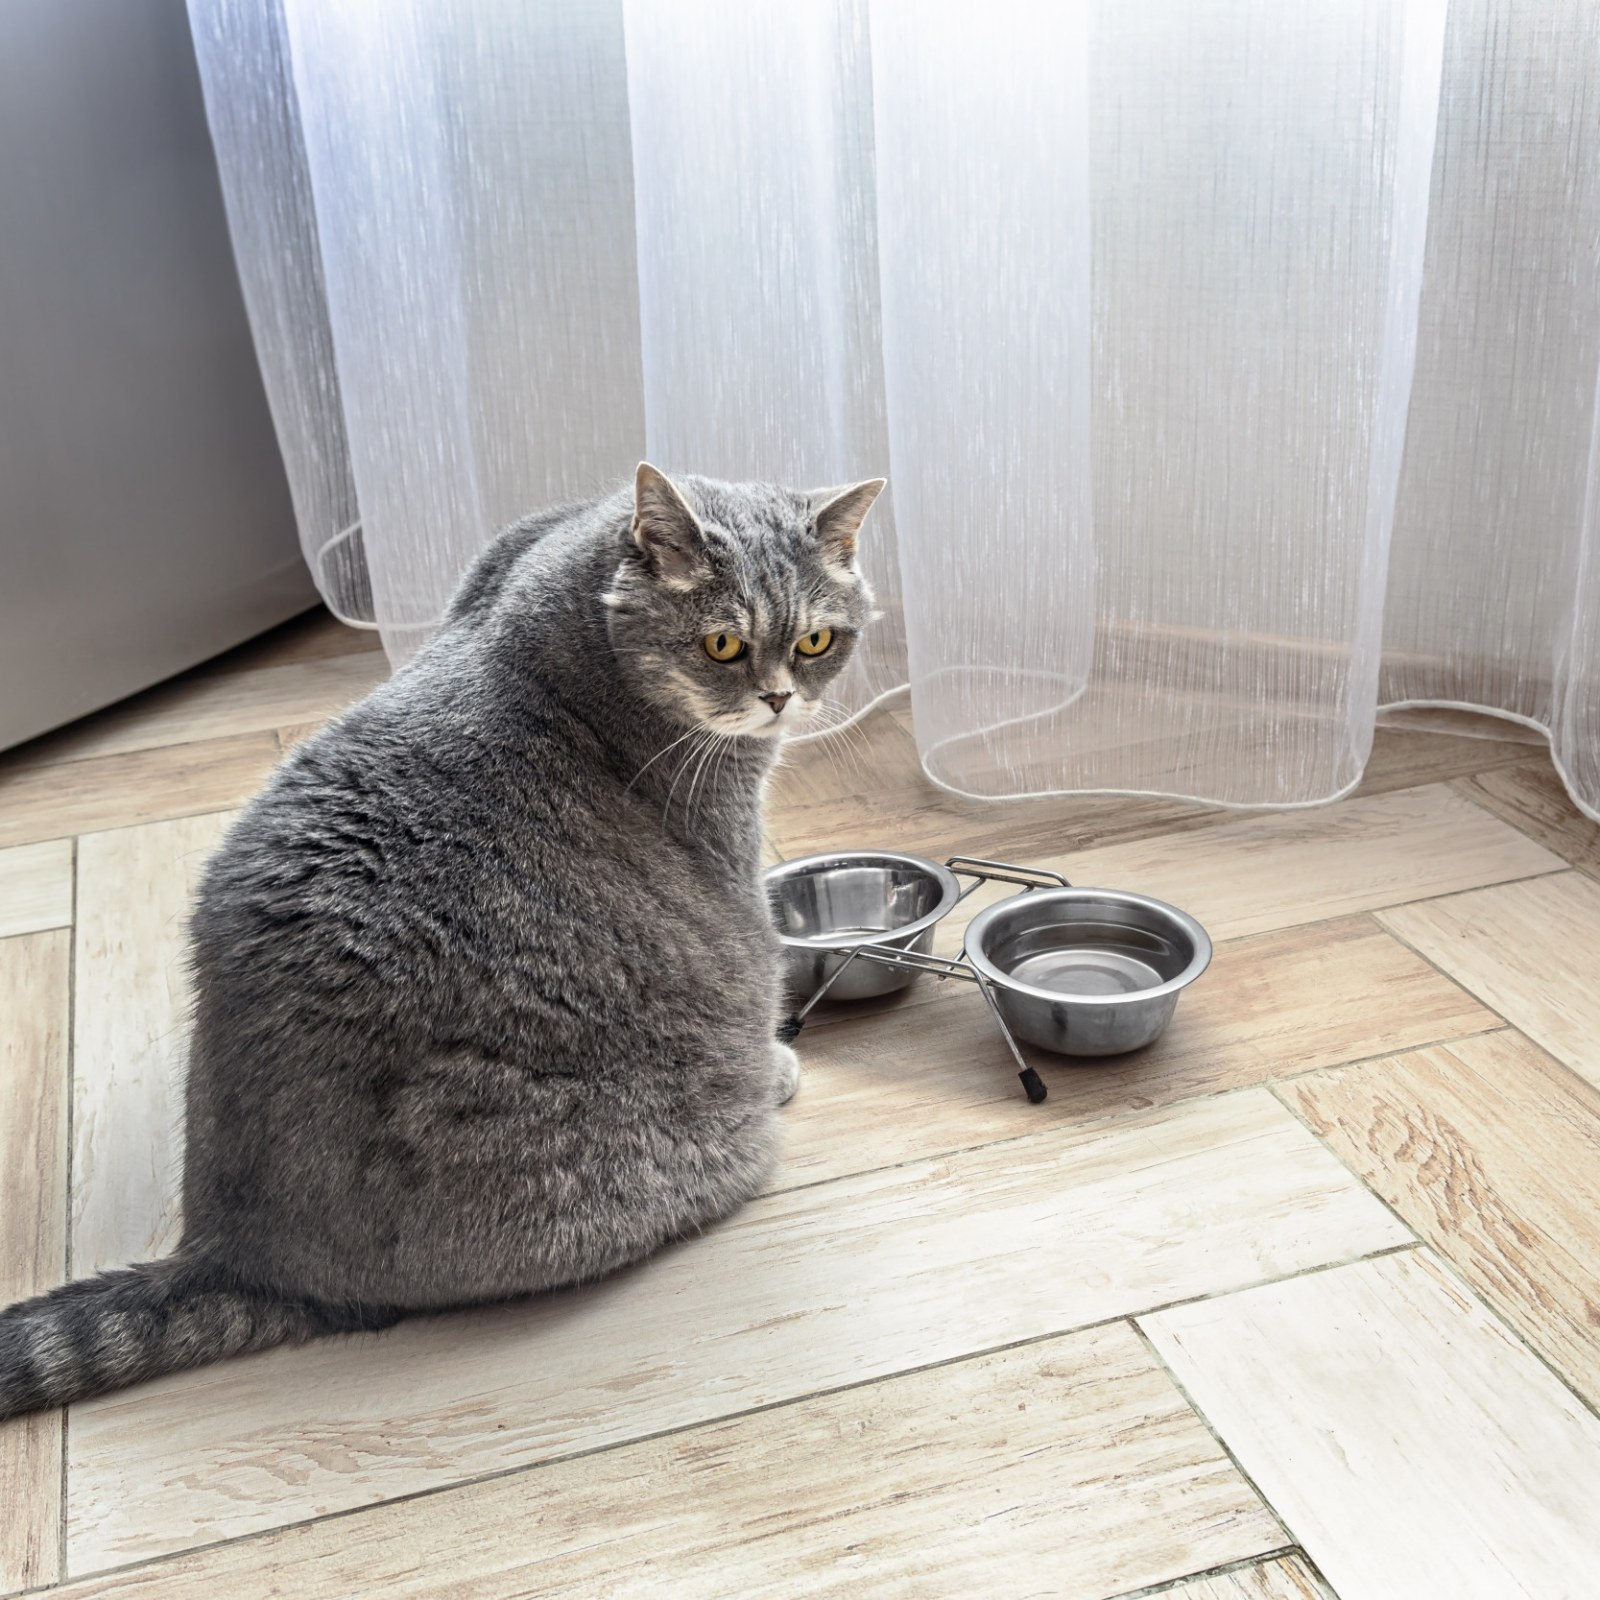

In [26]:
im

#analyze photo
yolo

In [27]:
import torch

In [28]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-28 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [29]:
# Inference
results = model(im)

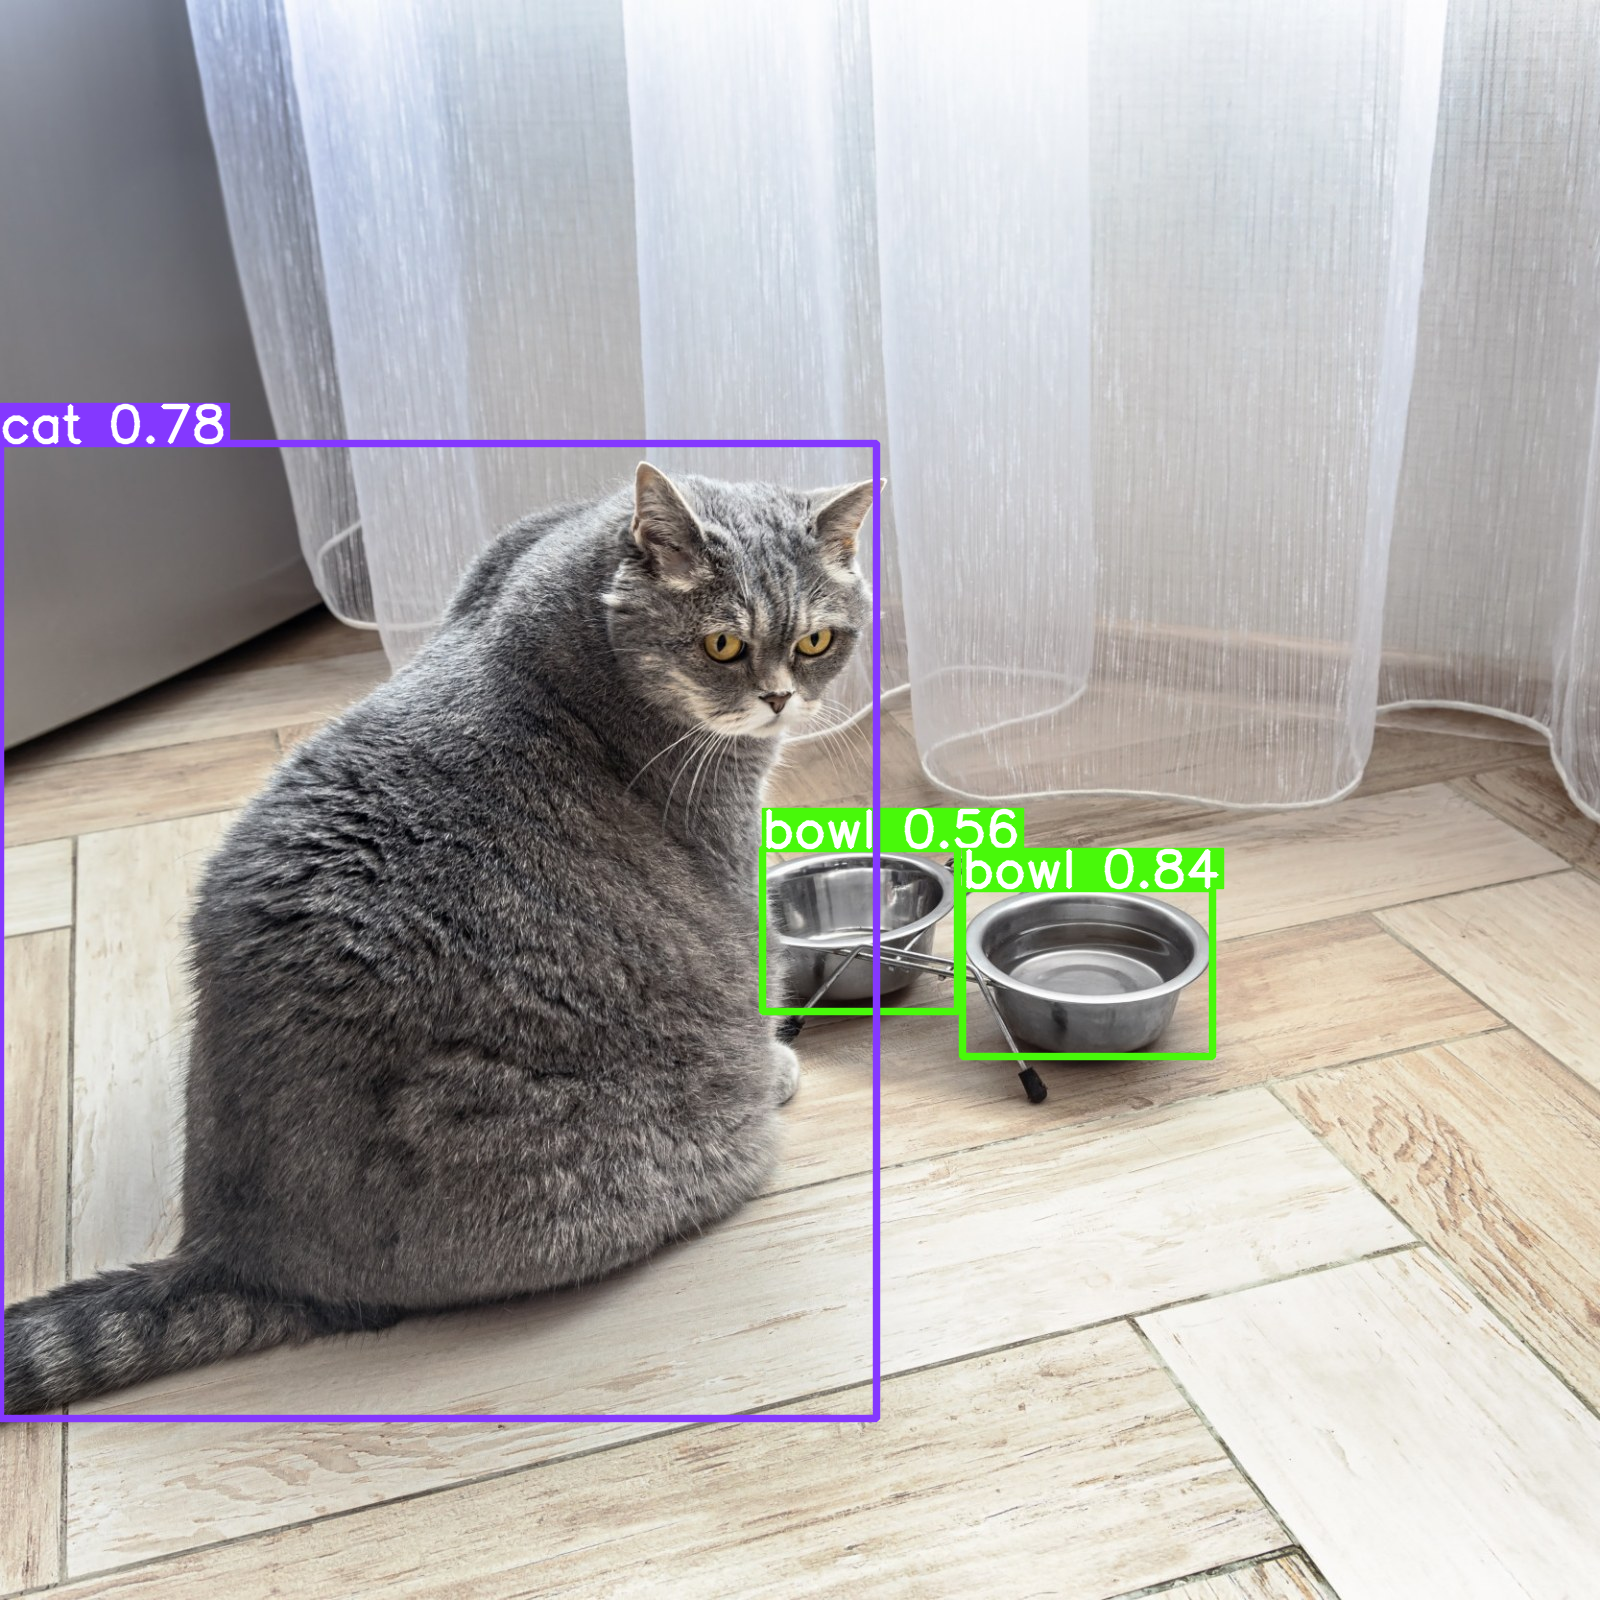

In [30]:
results.show()

#counting objects (bowl)

In [36]:
results.pandas().xyxy[0]

xmin        ymin         xmax         ymax  confidence  class  name
0  962.688538  888.406311  1212.386108  1056.374390    0.841323     45  bowl
1    0.000000  443.173553   876.307373  1418.203125    0.776806     15   cat
2  762.211121  848.647461   957.325256  1011.802368    0.559298     45  bowl

In [37]:
type(results.pandas().xyxy[0])

pandas.core.frame.DataFrame

In [38]:
df = results.pandas().xyxy[0]

In [39]:
df["name"] == "bowl"

0     True
1    False
2     True
Name: name, dtype: bool

In [41]:
sum(df["name"]=="bowl")

2

##example

In [42]:
url2 = "https://assets.telegraphindia.com/telegraph/216ef8ab-1c9c-4d48-a197-ec9581d6c756.jpg"

In [43]:
r = requests.get(url2)
with open("ppl.jpg", "wb") as f:
  f.write(r.content)

im2 = Image.open("ppl.jpg")

In [45]:
result = model(im2)

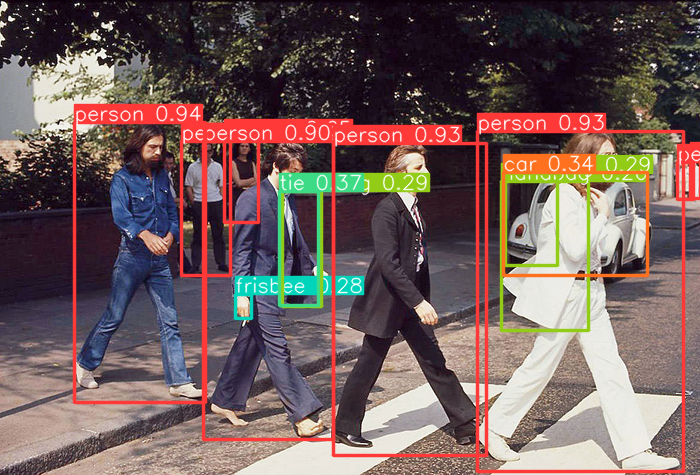

In [46]:
result.show()

In [47]:
result.pandas().xyxy[0]

xmin        ymin        xmax        ymax  confidence  class     name
0    74.595428  122.185127  205.351227  402.386414    0.939262      0   person
1   333.617981  143.800995  486.545990  455.581421    0.930207      0   person
2   477.683929  131.117264  683.010437  471.645477    0.925149      0   person
3   203.641205  141.912643  333.959015  439.755432    0.904769      0   person
4   181.965775  141.792587  230.210342  275.513214    0.868851      0   person
5   224.936829  137.336548  258.346741  222.114380    0.646106      0   person
6   677.046204  162.174561  693.026245  199.681152    0.536974      0   person
7   690.405762  160.724533  700.000000  198.875381    0.486801      0   person
8   279.585236  191.793823  318.816589  305.791718    0.365709     27      tie
9   503.240601  172.954910  647.829712  275.216003    0.337968      2      car
10  505.600006  173.002182  557.802856  265.512787    0.294586     26  handbag
11  282.961761  191.201126  321.660980  306.505646    0.292872     26  handbag
12  235.782684  294.884491  251.941162  318.140289    0.277511     29  frisbee
13  501.121277  181.450226  588.147766  330.011536    0.264519     26  handbag

In [49]:
df2 = result.pandas().xyxy[0]

In [50]:
df2["name"] == "person"

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13    False
Name: name, dtype: bool

In [51]:
sum(df2["name"] == "person")

8

#Garbage Classification

https://teachablemachine.withgoogle.com/train/image

In [ ]:
!unzip model.zip

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/8-clip_image005.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)
